In [1]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
# === Task 1: Imports & Load Data ===
# We are in notebooks/01_EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_theme(style="whitegrid")

print("All libraries imported successfully.")

# --- Load the Dataset ---
# We define the path to our data file.
# '..' means 'go up one folder' (from 'notebooks' to the main project folder)
# Then we go into 'data/raw/'
data_path = '../data/raw/accepted_2007_to_2018Q4.csv'

# This is a HUGE file. We'll start by loading just the first 100,000 rows.
# This lets us work fast. We'll use more data later.
NROWS_TO_LOAD = 500000

try:
    # We use pandas (pd) to read the csv file
    df = pd.read_csv(data_path, nrows=NROWS_TO_LOAD)
    
    # .shape shows (rows, columns)
    print(f"Data loaded successfully!")
    print(f"Shape of the loaded data: {df.shape}")
    
    # .head(5) shows the first 5 rows
    print("First 5 rows of the data:")
    display(df.head(5))

except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}")
    print("Please make sure the file 'accepted_2007_to_2018Q4.csv' is in the 'data/raw/' folder.")
except Exception as e:
    print(f"An error occurred: {e}")

All libraries imported successfully.


C:\Users\Asus\AppData\Local\Temp\ipykernel_15056\2171690425.py:26: DtypeWarning: Columns (0,19,59,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, nrows=NROWS_TO_LOAD)


Data loaded successfully!
Shape of the loaded data: (500000, 151)
First 5 rows of the data:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Analyzing our target column: 'loan_status'
--------------------------------------------------
Unique values and their counts:
loan_status
Fully Paid            312340
Current               104240
Charged Off            78824
Late (31-120 days)      2977
In Grace Period         1046
Late (16-30 days)        567
Default                    4
Name: count, dtype: int64


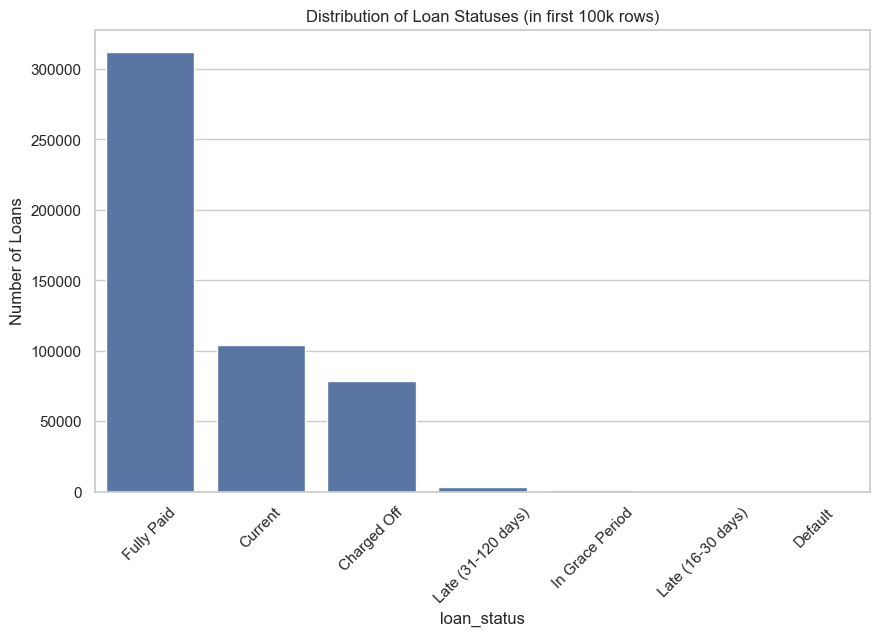

In [9]:
# === Task 1, Cell 2: Analyze the Target Variable ===

# This is the most important column for our project.
TARGET_COL = 'loan_status'

# .value_counts() is a powerful command.
# It counts every unique value in a column and shows you the totals.
print(f"Analyzing our target column: '{TARGET_COL}'")
print("--------------------------------------------------")
print("Unique values and their counts:")

# This counts how many of each type of loan status we have in our 100k rows
status_counts = df[TARGET_COL].value_counts()

print(status_counts)

# Let's visualize this as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Loan Statuses (in first 100k rows)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45) # Rotate x-axis labels so they don't overlap
plt.show()

In [11]:
# === Task 1, Cell 2.5: Check All Column Names ===

print("Checking all 151 column names to confirm our features exist...")
print("-----------------------------------------------------------")

# .columns.tolist() will print every single column name
all_cols = df.columns.tolist()
print(all_cols)

Checking all 151 column names to confirm our features exist...
-----------------------------------------------------------
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major

In [13]:
# === Task 1, Cell 3: Create Binary Target & Select Features ===

# 1. Define our "good" and "bad" loan statuses
#    'Charged Off' is the main "default" status.
bad_statuses = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

good_statuses = [
    'Fully Paid',
    'Does not meet the credit policy. Status:Fully Paid'
]

# 2. Create the new 'target' column
#    We will create a *new* DataFrame, 'df_clean', to hold this.
#    .loc[] is a powerful way to select rows.

# First, create a new 'target' column filled with 'NaN' (Not a Number)
df['target'] = np.nan

# Find rows with 'good_statuses' and set their 'target' to 0
df.loc[df['loan_status'].isin(good_statuses), 'target'] = 0

# Find rows with 'bad_statuses' and set their 'target' to 1
df.loc[df['loan_status'].isin(bad_statuses), 'target'] = 1

# 3. Filter out all other loans
#    We only want rows where 'target' is 0 or 1.
#    .dropna() on the 'target' column removes all rows that are still 'NaN'.
df_clean = df.dropna(subset=['target'])

# We also need to convert the 'target' column from decimal (1.0) to integer (1)
df_clean = df_clean.astype({'target': int})

print(f"Original shape: {df.shape}")
print(f"New shape after filtering: {df_clean.shape}")
print("\nTarget variable created! Let's check the new counts:")

# .value_counts() on the new 'target' column
print(df_clean['target'].value_counts())


# --- 4. Feature Engineering & Selection ---
# We will manually select a small, logical set of features.
# The dataset has 151 columns, which is too many.

# These are the features we believe are predictive
# (Justification: This is a mix of loan details, borrower finance, and credit history)
FEATURES_TO_KEEP = [
    # Loan Details
    'loan_amnt',      # The amount of the loan
    'term',           # The term (e.g., ' 36 months')
    'int_rate',       # The interest rate (as a percentage)
    
    # Borrower's Finances
    'annual_inc',     # The borrower's annual income
    'dti',            # Debt-to-Income ratio
    'emp_length',     # Employment length (e.g., '10+ years')
    
    # Borrower's Credit History
    'pub_rec',        # Number of derogatory public records
    'revol_util',     # Revolving line utilization rate (e.g., '50%')
    'total_acc',      # Total number of credit accounts
    'open_acc',       # Number of open credit accounts
    'mort_acc',       # Number of mortgage accounts
    'fico_range_low'  # The low-end of the FICO score (e.g., 690)
]

# We also need to keep our new 'target' column
TARGET_COL = 'target'

# Create the final DataFrame with only these columns
df_model = df_clean[FEATURES_TO_KEEP + [TARGET_COL]].copy()

print("\n--- Feature Selection Complete ---")
print(f"Final model DataFrame shape: {df_model.shape}")
print("First 5 rows of the new model data:")
display(df_model.head())

Original shape: (500000, 152)
New shape after filtering: (391168, 152)

Target variable created! Let's check the new counts:
target
0    312340
1     78828
Name: count, dtype: int64

--- Feature Selection Complete ---
Final model DataFrame shape: (391168, 13)
First 5 rows of the new model data:


,loan_amnt,term,int_rate,annual_inc,dti,emp_length,pub_rec,revol_util,total_acc,open_acc,mort_acc,fico_range_low,target
0,3600.0,36 months,13.99,55000.0,5.91,10+ years,0.0,29.7,13.0,7.0,1.0,675.0,0
1,24700.0,36 months,11.99,65000.0,16.06,10+ years,0.0,19.2,38.0,22.0,4.0,715.0,0
2,20000.0,60 months,10.78,63000.0,10.78,10+ years,0.0,56.2,18.0,6.0,5.0,695.0,0
4,10400.0,60 months,22.45,104433.0,25.37,3 years,0.0,64.5,35.0,12.0,6.0,695.0,0
5,11950.0,36 months,13.44,34000.0,10.20,4 years,0.0,68.4,6.0,5.0,0.0,690.0,0


In [14]:
# === Task 1, Cell 4: Data Cleaning & Preprocessing ===

# 1. Check for missing values
# .isnull().sum() counts how many 'NaN' values are in each column
print("--- Missing Value Check ---")
print(df_model.isnull().sum())


# --- 2. Clean Categorical Features ---
# We need to convert text columns into numbers.

# Clean 'term': Remove " months" and convert to a number
# .str.replace() is a text operation
df_model['term'] = df_model['term'].str.replace(' months', '').astype(int)

# Clean 'emp_length': This is trickier.
# '< 1 year' -> 0
# '10+ years' -> 10
# '3 years' -> 3
# We'll use .str.replace() with 'regex' (Regular Expressions)
df_model['emp_length'] = df_model['emp_length'].str.replace('< 1 year', '0 years')
df_model['emp_length'] = df_model['emp_length'].str.replace('10+ years', '10 years')
# Now, extract only the number part
df_model['emp_length'] = df_model['emp_length'].str.extract(r'(\d+)').astype(float)

# Clean 'revol_util': This is a percentage (e.g., '29.7%').
# We already loaded it as a number (e.g., 29.7).
# If it were text, we'd use: .str.replace('%', '').astype(float)
# For now, it seems fine, but we'll check its type.
print(f"\nData type of 'revol_util': {df_model['revol_util'].dtype}")


# --- 3. Handle Missing Values (Imputation) ---
# Our AI models cannot handle *any* missing data. We must fill it.
# A simple, strong strategy is to fill with the 'median' (the middle value).

# We will fill 'emp_length' with its median (e.g., 6.0)
emp_length_median = df_model['emp_length'].median()
df_model['emp_length'] = df_model['emp_length'].fillna(emp_length_median)

# We'll fill 'dti' with its median
dti_median = df_model['dti'].median()
df_model['dti'] = df_model['dti'].fillna(dti_median)

# We'll fill 'revol_util' with its median
revol_util_median = df_model['revol_util'].median()
df_model['revol_util'] = df_model['revol_util'].fillna(revol_util_median)

# We'll fill 'mort_acc' with its median (which is likely 0)
mort_acc_median = df_model['mort_acc'].median()
df_model['mort_acc'] = df_model['mort_acc'].fillna(mort_acc_median)

# Let's fill the few others just in case
df_model = df_model.fillna(df_model.median())


# --- 4. Final Check ---
print("\n--- Missing Values After Cleaning ---")
print(df_model.isnull().sum())

print("\n--- Cleaned Data Sample ---")
print(f"Final, cleaned shape: {df_model.shape}")
display(df_model.head())

--- Missing Value Check ---
loan_amnt             0
term                  0
int_rate              0
annual_inc            0
dti                  54
emp_length        23471
pub_rec               0
revol_util          174
total_acc             0
open_acc              0
mort_acc              0
fico_range_low        0
target                0
dtype: int64

Data type of 'revol_util': float64

--- Missing Values After Cleaning ---
loan_amnt         0
term              0
int_rate          0
annual_inc        0
dti               0
emp_length        0
pub_rec           0
revol_util        0
total_acc         0
open_acc          0
mort_acc          0
fico_range_low    0
target            0
dtype: int64

--- Cleaned Data Sample ---
Final, cleaned shape: (391168, 13)


,loan_amnt,term,int_rate,annual_inc,dti,emp_length,pub_rec,revol_util,total_acc,open_acc,mort_acc,fico_range_low,target
0,3600.0,36,13.99,55000.0,5.91,10.0,0.0,29.7,13.0,7.0,1.0,675.0,0
1,24700.0,36,11.99,65000.0,16.06,10.0,0.0,19.2,38.0,22.0,4.0,715.0,0
2,20000.0,60,10.78,63000.0,10.78,10.0,0.0,56.2,18.0,6.0,5.0,695.0,0
4,10400.0,60,22.45,104433.0,25.37,3.0,0.0,64.5,35.0,12.0,6.0,695.0,0
5,11950.0,36,13.44,34000.0,10.20,4.0,0.0,68.4,6.0,5.0,0.0,690.0,0


In [15]:
# === Task 1, Cell 5: Split, Scale, and Save Data ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib # For saving our scaler

# 1. Define Features (X) and Target (y)
# X is our 12 feature columns
X = df_model.drop(columns=['target']) 
# y is just our single target column
y = df_model['target']

# 2. Split the data
#    test_size=0.2 means 20% of data is for testing, 80% is for training.
#    random_state=42 ensures we get the same "random" split every time.
#    stratify=y ensures our train and test sets have the same
#    percentage of 0s and 1s as the original data. This is very important!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Original shape:   {X.shape}")
print(f"Training shape (X): {X_train.shape}")
print(f"Test shape (X):     {X_test.shape}")

# 3. Scale the Feature Data
#    We will only 'fit' the scaler to the TRAINING data.
#    This prevents "data leakage" (cheating) from the test set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Note: .transform() only, NOT .fit_transform()

# Convert scaled arrays back to DataFrames to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\n--- Data Scaled ---")
print("First 5 rows of scaled training data:")
display(X_train_scaled.head())

# 4. Save everything
#    We'll save our data in 'Parquet' format. It's fast and small.
#    We first combine the features (X) and target (y) back together.
train_data = X_train_scaled.join(y_train)
test_data = X_test_scaled.join(y_test)

# Define our processed data paths
train_path = '../data/processed/train.parquet'
test_path = '../data/processed/test.parquet'
scaler_path = '../models/scaler.joblib'

# Create the 'processed' and 'models' directories if they don't exist
import os
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Save the data
train_data.to_parquet(train_path)
test_data.to_parquet(test_path)

# Save the scaler object so we can use it later
joblib.dump(scaler, scaler_path)

print(f"\n--- Data Saved! ---")
print(f"Training data saved to: {train_path}")
print(f"Test data saved to:     {test_path}")
print(f"Scaler object saved to: {scaler_path}")

C:\Users\Asus\miniconda3\envs\shodh_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Asus\miniconda3\envs\shodh_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Original shape:   (391168, 12)
Training shape (X): (312934, 12)
Test shape (X):     (78234, 12)

--- Data Scaled ---
First 5 rows of scaled training data:


C:\Users\Asus\miniconda3\envs\shodh_env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Asus\miniconda3\envs\shodh_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Asus\miniconda3\envs\shodh_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Asus\miniconda3\envs\shodh_env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

,loan_amnt,term,int_rate,annual_inc,dti,emp_length,pub_rec,revol_util,total_acc,open_acc,mort_acc,fico_range_low
41094,0.737034,1.744741,0.040160,0.313690,-0.970261,1.117687,-0.365734,-1.578159,0.791257,0.736024,0.169932,0.028159
91912,-1.078352,-0.573151,-0.028520,-0.508550,1.983979,1.117687,-0.365734,-0.549676,-0.112613,0.558369,-0.332658,0.676154
201663,0.684667,1.744741,1.335930,-0.182306,1.805061,1.117687,-0.365734,0.495395,0.051727,-0.152254,-0.835247,-0.295838
491903,-0.025195,-0.573151,1.292433,-0.150478,1.575626,-1.660889,-0.365734,-0.375498,-0.030443,0.203057,0.672522,0.676154
154509,1.784372,1.744741,1.734276,0.101499,0.048515,-0.271601,-0.365734,-0.354762,0.380407,1.091335,-0.835247,-0.619836



--- Data Saved! ---
Training data saved to: ../data/processed/train.parquet
Test data saved to:     ../data/processed/test.parquet
Scaler object saved to: ../models/scaler.joblib
